In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import f1_score, accuracy_score, roc_curve, precision_recall_curve, PrecisionRecallDisplay, roc_auc_score, RocCurveDisplay, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

from imblearn.over_sampling import SMOTE

In [2]:
random_state = 42

In [3]:
# #load data on Yanqi Hong's computer
# data = pd.read_csv('E:\DATA\TUD\Master\TUD_Master_Y1\Q1\EE4C12 Machine Learning For Electrical Engineering\CodeLab\Project\S&S_SZD (1)\Data\Project_Data_EE4C12_S&S_SZD.csv')
# data

# load data on Zhixuan's computer
data = pd.read_csv('D:\\User\Zhixuan Ge\Onedrive TUDelft\OneDrive - Delft University of Technology\Courses\ML for EE\SZD\S&S_SZD\Project_Data_EE4C12_S&S_SZD.csv')
data

,Patient,annotation,min|FP1-F7,min|F7-T3,min|T3-T5,min|T5-O1,min|FP2-F8,min|F8-T4,min|T4-T6,min|T6-O2,...,norm_power_HF|CZ-C4,norm_power_HF|C4-T4,norm_power_HF|FP1-F3,norm_power_HF|F3-C3,norm_power_HF|C3-P3,norm_power_HF|P3-O1,norm_power_HF|FP2-F4,norm_power_HF|F4-C4,norm_power_HF|C4-P4,norm_power_HF|P4-O2
0,258,1,50,61,57,53,39,35,39,35,...,0.016087,0.066920,0.102402,0.481384,0.690787,0.154544,0.062533,0.046460,0.066575,0.086999
1,258,1,48,62,60,46,38,35,39,33,...,0.024006,0.064857,0.031791,0.225788,0.409987,0.184671,0.071133,0.022369,0.079494,0.047536
2,258,1,51,60,59,45,38,36,40,36,...,0.037326,0.100177,0.050009,0.622584,0.394504,0.225516,0.050673,0.044906,0.102142,0.068105
3,258,1,49,58,56,42,36,36,41,37,...,0.027546,0.107883,0.014017,0.359140,0.276964,0.104977,0.018042,0.079467,0.078255,0.089385
4,258,1,45,57,61,41,35,37,41,37,...,0.036820,0.182520,0.031397,0.328354,0.156929,0.151952,0.047532,0.135071,0.098320,0.137701
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55451,11580,-1,75,73,81,80,66,80,77,75,...,0.244334,0.625396,0.023821,0.058277,0.083594,0.114426,0.119654,0.295364,0.185930,0.199585
55452,11580,-1,74,74,77,71,79,75,82,77,...,0.588236,0.743060,0.076294,0.332341,0.228458,0.170603,0.351418,0.638666,0.490806,0.307429
55453,11580,-1,72,76,72,73,74,76,80,76,...,0.296041,0.770194,0.041190,0.090919,0.186074,0.216797,0.231053,0.770637,0.285257,0.413382
55454,11580,-1,77,82,74,75,82,85,80,76,...,0.440360,0.720855,0.026959,0.026340,0.077674,0.269610,0.186769,0.790173,0.473615,0.415771


In [4]:
X = data.iloc[:, 2:].values
y = np.int32(data['annotation'].values)

test_size = 0.25
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

In [5]:
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

Over sampling

In [6]:
num_z=np.sum(y_train==0)
num_p=np.sum(y_train==1)
num_n=np.sum(y_train==-1)
print('The number of 0 is', num_z)
print('The number of 1 is', num_p)
print('The number of -1 is', num_n)

# oversampling
sm = SMOTE(random_state=random_state)
X_train_proc, y_train_proc = sm.fit_resample(X_train_scaled, y_train)
X_test_proc = X_test_scaled
y_test_proc = y_test

num_z=np.sum(y_train_proc==0)
num_p=np.sum(y_train_proc==1)
num_n=np.sum(y_train_proc==-1)

print('The number of 0 is', num_z)
print('The number of 1 is', num_p)
print('The number of -1 is', num_n)

The number of 0 is 1469
The number of 1 is 18177
The number of -1 is 21946
The number of 0 is 21946
The number of 1 is 21946
The number of -1 is 21946


No over sampling

In [7]:
# X_train_proc = X_train_scaled
# y_train_proc = y_train
# X_test_proc = X_test_scaled
# y_test_proc = y_test

No selection

In [8]:
# X_train_proc = X_train_proc
# X_test_proc = X_test_proc

PCA

0.8996515016315936


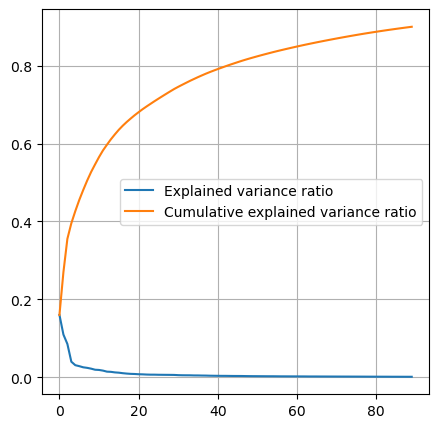

In [9]:
pca = PCA(90).fit(X_train_proc)

plt.figure(figsize=(5,5))
print(pca.explained_variance_ratio_.sum())
plt.plot(pca.explained_variance_ratio_, label='Explained variance ratio',)
plt.plot(pca.explained_variance_ratio_.cumsum(), label='Cumulative explained variance ratio')
plt.grid()
plt.legend()
plt.show()

X_train_proc = pca.transform(X_train_proc)
X_test_proc = pca.transform(X_test_proc)

ExtraTreesClassifier

In [10]:
def performance_eval(true, pred, score_display=True, matrix_display=True, result_return=False):
    Accuracy = accuracy_score(true, pred)
    F1 = accuracy_score(true, pred)
    Precision = accuracy_score(true, pred)
    Recall = accuracy_score(true, pred)
    
    if score_display==True:
        print("Accuracy: " + str(Accuracy))
        print("F1 score: " + str(F1))
        print("Recall score: " + str(Recall))
        print("Precision score: " + str(Precision))
        
    if matrix_display==True:
        label = ['Non-seizure', 'Transition','seizure']
        cm = confusion_matrix(true, pred)
        cm_display = ConfusionMatrixDisplay(cm, display_labels=label).plot()
        plt.show(cm_display)
    
    if result_return:
        return Accuracy, F1, Precision, Recall

In [11]:
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)

In [23]:
SVC(max_iter=10).fit(X_train_proc, y_train_proc)

d:\Languages\Anaconda\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


SVC(max_iter=10)

In [41]:
test = np.power(10, np.arange(-2, 2, 0.001))

In [60]:
clf_svc_rs = SVC(max_iter=1000)

C = np.power(10, np.arange(-2, 2, 0.1))
param_dist = {"kernel": ['linear', 'poly', 'rbf', 'sigmoid'], 
              "C": C, 
              'gamma': np.arange(0,1,1e-4),
              'coef0': np.arange(-1,1,1e-2)
              }

n_iter_search = 50
random_search = RandomizedSearchCV(clf_svc_rs, param_distributions=param_dist,
                                   n_iter=n_iter_search, cv=5, verbose=3, n_jobs=8,
                                   random_state=random_state)

random_search.fit(X_train_proc, y_train_proc)
y_pred = random_search.predict(X_test_proc)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


d:\Languages\Anaconda\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Accuracy: 0.6749855741488748
F1 score: 0.6749855741488748
Recall score: 0.6749855741488748
Precision score: 0.6749855741488748


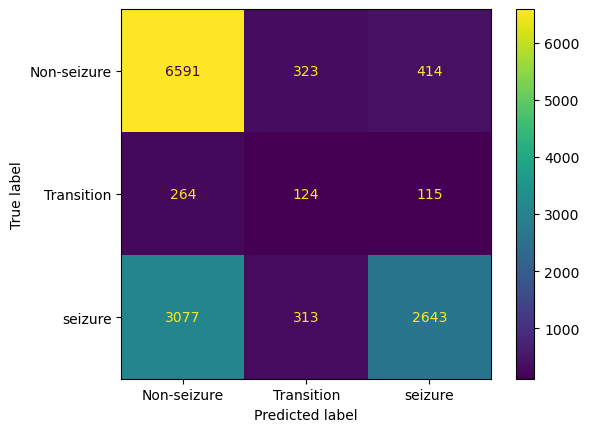

In [61]:
performance_eval(y_test_proc, y_pred)